In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]

iris_df = pd.read_csv(url, header=None, names=column_names)
iris_df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris_df.groupby("class")["sepal_length"].mean()

class
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: sepal_length, dtype: float64

In [17]:
iris_df[iris_df["class"] == "Iris-setosa"]["petal_width"].max()

np.float64(0.6)

([<matplotlib.axis.XTick at 0x255a40d05c0>,
 [Text(0.0, 0, '0.0'),
  Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0'),
  Text(3.5, 0, '3.5'),
  Text(4.0, 0, '4.0'),
  Text(4.5, 0, '4.5'),
  Text(5.0, 0, '5.0'),
  Text(5.5, 0, '5.5'),
  Text(6.0, 0, '6.0'),
  Text(6.5, 0, '6.5')])

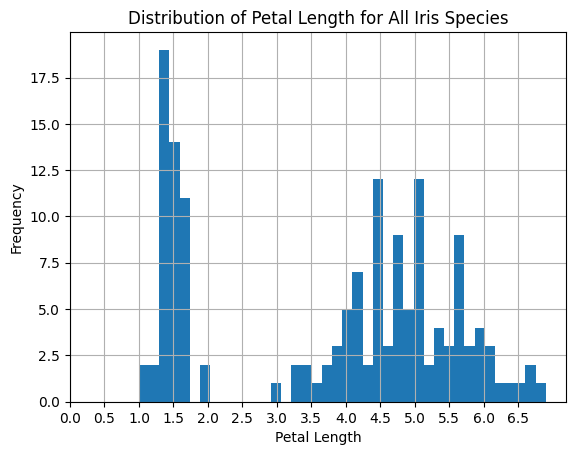

In [44]:
petal_length_col = iris_df["petal_length"]
petal_length_col.hist(bins=40)
plt.title("Distribution of Petal Length for All Iris Species")
plt.xlabel("Petal Length")
plt.ylabel("Frequency")
plt.xticks(np.arange(0, petal_length_col.max(), 0.5))

In [51]:
petal_length_fr = iris_df["petal_length"].value_counts().sort_index()

In [21]:
iris_df.sort_values(by="petal_length", ascending=False).tail()

,sepal_length,sepal_width,petal_length,petal_width,class
41,4.5,2.3,1.3,0.3,Iris-setosa
35,5.0,3.2,1.2,0.2,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
22,4.6,3.6,1.0,0.2,Iris-setosa


In [23]:
iris_df.groupby("class")["petal_length"].mean()

class
Iris-setosa        1.464
Iris-versicolor    4.260
Iris-virginica     5.552
Name: petal_length, dtype: float64

In [32]:
iris_df.groupby("class")["sepal_length"].min()

class
Iris-setosa        4.3
Iris-versicolor    4.9
Iris-virginica     4.9
Name: sepal_length, dtype: float64

In [79]:
iris_df.query(f"petal_length > {iris_df['petal_length'].mean()}")["class"].value_counts()

class
Iris-virginica     50
Iris-versicolor    43
Name: count, dtype: int64

In [85]:
iris_df["avg_petal_length"] = iris_df["petal_length"].mean()
iris_df["avg_petal_length_by_class"] = iris_df.groupby("class")["petal_length"].transform("mean")
iris_df.query(f"petal_length > {iris_df['petal_length'].mean()}")[["class", "avg_petal_length" ,"avg_petal_length_by_class"]].value_counts()

class            avg_petal_length  avg_petal_length_by_class
Iris-virginica   3.758667          5.552                        50
Iris-versicolor  3.758667          4.260                        43
Name: count, dtype: int64

In [89]:
iris_df.groupby("class")["petal_length"].mean()

class
Iris-setosa        1.464
Iris-versicolor    4.260
Iris-virginica     5.552
Name: petal_length, dtype: float64